In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
data_dir="E:\Work\Python\PythonTrainings\PythonMcKinsey\Data"
os.chdir(data_dir)
%matplotlib inline

In [2]:
data=pd.read_csv("dm.csv")

In [3]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [4]:
### Data Exploration
data.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

In [5]:
data.describe()

,Salary,Children,Catalogs,AmountSpent,Cust_Id
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000,643.930000
std,30616.314826,1.05107,6.622895,961.068613,369.047166
min,10100.000000,0.00000,6.000000,38.000000,12.000000
25%,29975.000000,0.00000,6.000000,488.250000,316.750000
50%,53700.000000,1.00000,12.000000,962.000000,636.000000
75%,77025.000000,2.00000,18.000000,1688.500000,955.500000
max,168800.000000,3.00000,24.000000,6217.000000,1297.000000


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


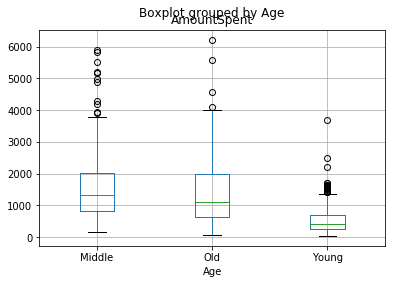

In [6]:
### Bivariate analysis
data.boxplot(by='Age',column='AmountSpent')

In [7]:
## Make old and middle as one category
data['Age']=data['Age'].map(lambda x: "Young" if x=="Young" else "Middle-Old")

In [8]:
data["Age"].value_counts()

Middle-Old    713
Young         287
Name: Age, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


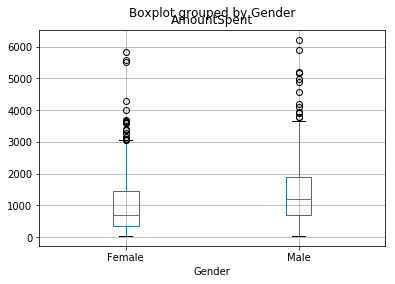

In [9]:
## Gender
data.boxplot(column="AmountSpent",by="Gender")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


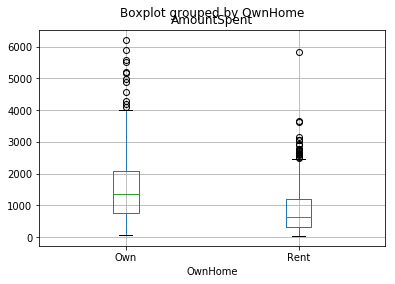

In [10]:
## OwnHome
data.boxplot(column="AmountSpent",by="OwnHome")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


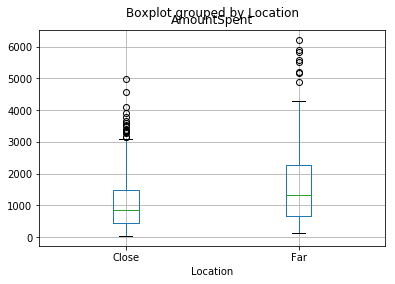

In [11]:
## Location
data.boxplot(column="AmountSpent",by="Location")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


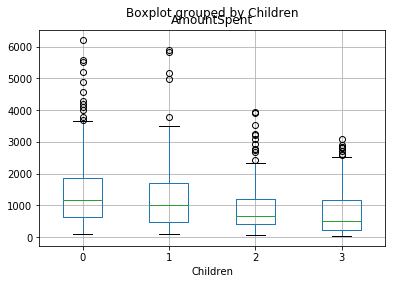

In [12]:
### Children
data.boxplot(column="AmountSpent",by="Children")

In [13]:
data['Children']=data['Children'].map(lambda x: "0-1" if x<=1 else "2-3")

In [14]:
data["History"]=data['History'].fillna("NewCustomer")

In [15]:
data["History"].value_counts()

NewCustomer    303
High           255
Low            230
Medium         212
Name: History, dtype: int64

In [16]:
## Create Dummies
data_relevant=data.drop("Cust_Id",axis=1)

In [17]:
data_relevant.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Middle-Old,Female,Own,Single,Far,47500,0-1,High,6,755
1,Middle-Old,Male,Rent,Single,Close,63600,0-1,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0-1,Low,18,296
3,Middle-Old,Male,Own,Married,Close,85600,0-1,High,18,2436
4,Middle-Old,Female,Own,Single,Close,68400,0-1,High,12,1304


In [18]:
## Create a test train split
data_train=data_relevant.sample(frac=0.75,random_state=200)
data_test=data_relevant.drop(data_train.index)

In [19]:
## Create models
import statsmodels.formula.api as smf

In [20]:
model1=smf.ols("AmountSpent~Salary+C(Married)",data=data_train).fit()

In [21]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     348.4
Date:                Tue, 28 Nov 2017   Prob (F-statistic):          1.31e-107
Time:                        20:25:44   Log-Likelihood:                -5973.4
No. Observations:                 750   AIC:                         1.195e+04
Df Residuals:                     747   BIC:                         1.197e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               26.0058 

In [22]:
## Create a model with all the variables
"+".join(data_train.drop("AmountSpent",axis=1).columns)

'Age+Gender+OwnHome+Married+Location+Salary+Children+History+Catalogs'

In [23]:
model2=smf.ols("AmountSpent~C(Age)+C(Gender)+C(OwnHome)+C(Married)+C(Location)+Salary+C(Children)+C(History)+Catalogs",data=data_train).fit()

In [24]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     196.4
Date:                Tue, 28 Nov 2017   Prob (F-statistic):          1.13e-210
Time:                        20:25:44   Log-Likelihood:                -5707.5
No. Observations:                 750   AIC:                         1.144e+04
Df Residuals:                     738   BIC:                         1.149e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [25]:
## Create manual dummies for History Low and Medium
data_train['History'].value_counts()

NewCustomer    215
High           189
Low            179
Medium         167
Name: History, dtype: int64

In [26]:
# Create dummies for both test and training datasets
data_train["Hist_Low"]=data_train['History'].map(lambda x: 1 if x=="Low" else 0)
data_test["Hist_Low"]=data_test['History'].map(lambda x: 1 if x=="Low" else 0)
data_train["Hist_Med"]=data_train['History'].map(lambda x: 1 if x=="Medium" else 0)
data_test["Hist_Med"]=data_test['History'].map(lambda x: 1 if x=="Medium" else 0)

In [27]:
data_train.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Hist_Low', 'Hist_Med'],
      dtype='object')

In [28]:
## Drop:Age,Gender,OwnHome,Married
model3=smf.ols("AmountSpent~C(Location)+Salary+C(Children)+Hist_Low+Hist_Med+Catalogs",data=data_train).fit()

In [29]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     358.4
Date:                Tue, 28 Nov 2017   Prob (F-statistic):          1.80e-215
Time:                        20:25:45   Log-Likelihood:                -5710.7
No. Observations:                 750   AIC:                         1.144e+04
Df Residuals:                     743   BIC:                         1.147e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -283.1875     66

In [30]:
### Do model assumption checks
# Not normal, JB
# Hetros: check
residuals=model3.resid
actual=model3.predict()

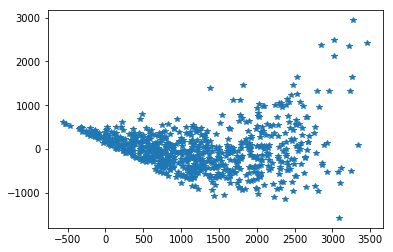

In [31]:
plt.plot(actual,residuals,"*")

In [32]:
## There is a funnel
model4=smf.ols("np.sqrt(AmountSpent)~C(Location)+Salary+C(Children)+Hist_Low+Hist_Med+Catalogs",data=data_train).fit()

In [33]:
print(model4.summary())

                             OLS Regression Results                             
Dep. Variable:     np.sqrt(AmountSpent)   R-squared:                       0.825
Model:                              OLS   Adj. R-squared:                  0.824
Method:                   Least Squares   F-statistic:                     583.9
Date:                  Tue, 28 Nov 2017   Prob (F-statistic):          2.80e-277
Time:                          20:25:46   Log-Likelihood:                -2342.0
No. Observations:                   750   AIC:                             4698.
Df Residuals:                       743   BIC:                             4730.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

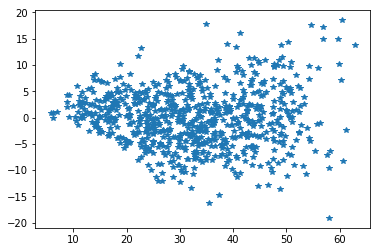

In [34]:
plt.plot(model4.predict(),model4.resid,"*")

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
## Create an exog matrix
from patsy import dmatrices
features="C(Location)+Salary+C(Children)+Hist_Low+Hist_Med+Catalogs"
# get y and X dataframes based on this regression:
y, X = dmatrices('np.sqrt(AmountSpent)~' + features, data_train, return_type='dataframe')

In [37]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [38]:
vif.round(1)

,VIF Factor,features
0,13.7,Intercept
1,1.1,C(Location)[T.Far]
2,1.1,C(Children)[T.2-3]
3,1.4,Salary
4,1.6,Hist_Low
5,1.2,Hist_Med
6,1.1,Catalogs


In [39]:

## We can try log transform as well
model5=smf.ols("np.log(AmountSpent)~C(Location)+Salary+C(Children)+Hist_Low+Hist_Med+Catalogs",data=data_train).fit()

In [40]:


print(model5.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(AmountSpent)   R-squared:                       0.835
Model:                             OLS   Adj. R-squared:                  0.833
Method:                  Least Squares   F-statistic:                     625.3
Date:                 Tue, 28 Nov 2017   Prob (F-statistic):          1.85e-286
Time:                         20:25:47   Log-Likelihood:                -283.47
No. Observations:                  750   AIC:                             580.9
Df Residuals:                      743   BIC:                             613.3
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.5

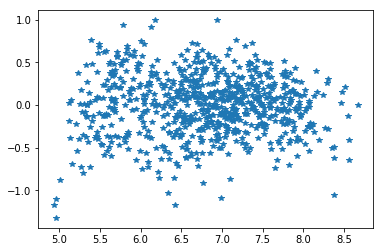

In [41]:
plt.plot(model5.predict(),model5.resid,"*")

In [42]:
features="C(Location)+Salary+C(Children)+Hist_Low+Hist_Med+Catalogs"
# get y and X dataframes based on this regression:
y, X = dmatrices('np.log(AmountSpent)~' + features, data_train, return_type='dataframe')

In [43]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [44]:
vif.round(1)

,VIF Factor,features
0,13.7,Intercept
1,1.1,C(Location)[T.Far]
2,1.1,C(Children)[T.2-3]
3,1.4,Salary
4,1.6,Hist_Low
5,1.2,Hist_Med
6,1.1,Catalogs
